In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics._classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import tqdm

In [2]:
data = pd.read_csv('final_features_96.csv')

In [3]:
data.head(2)

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,...,-13.240540,-35.406901,-33.057641,-22.903015,-6.279673,-3.470418,-12.132645,-8.762915,-16.139727,-8.468419
1,1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,...,-37.242324,-31.066498,-45.401839,-23.039135,-5.305946,19.393062,16.864331,-17.193637,19.457991,-29.883955


In [4]:
#data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

In [5]:
data.head(2)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,...,-13.240540,-35.406901,-33.057641,-22.903015,-6.279673,-3.470418,-12.132645,-8.762915,-16.139727,-8.468419
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,...,-37.242324,-31.066498,-45.401839,-23.039135,-5.305946,19.393062,16.864331,-17.193637,19.457991,-29.883955


In [6]:
list(data.columns)

['cwc_min',
 'cwc_max',
 'csc_min',
 'csc_max',
 'ctc_min',
 'ctc_max',
 'last_word_eq',
 'first_word_eq',
 'abs_len_diff',
 'mean_len',
 'token_set_ratio',
 'token_sort_ratio',
 'fuzz_ratio',
 'fuzz_partial_ratio',
 'longest_substr_ratio',
 'freq_qid1',
 'freq_qid2',
 'q1len',
 'q2len',
 'q1_n_words',
 'q2_n_words',
 'word_Common',
 'word_Total',
 'word_share',
 'freq_q1+q2',
 'freq_q1-q2',
 '0_x',
 '1_x',
 '2_x',
 '3_x',
 '4_x',
 '5_x',
 '6_x',
 '7_x',
 '8_x',
 '9_x',
 '10_x',
 '11_x',
 '12_x',
 '13_x',
 '14_x',
 '15_x',
 '16_x',
 '17_x',
 '18_x',
 '19_x',
 '20_x',
 '21_x',
 '22_x',
 '23_x',
 '24_x',
 '25_x',
 '26_x',
 '27_x',
 '28_x',
 '29_x',
 '30_x',
 '31_x',
 '32_x',
 '33_x',
 '34_x',
 '35_x',
 '36_x',
 '37_x',
 '38_x',
 '39_x',
 '40_x',
 '41_x',
 '42_x',
 '43_x',
 '44_x',
 '45_x',
 '46_x',
 '47_x',
 '48_x',
 '49_x',
 '50_x',
 '51_x',
 '52_x',
 '53_x',
 '54_x',
 '55_x',
 '56_x',
 '57_x',
 '58_x',
 '59_x',
 '60_x',
 '61_x',
 '62_x',
 '63_x',
 '64_x',
 '65_x',
 '66_x',
 '67_x',
 '6

In [7]:
y_true = list(y_true)

In [8]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [9]:
X_train

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
176729,0.999975,0.666656,0.999950,0.499988,0.999983,0.545450,0.0,1.0,5.0,8.5,...,0.656528,4.779000,-21.043722,-7.162956,-33.968713,5.861549,2.558603,-13.326692,-3.388921,0.497672
76094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.0,11.0,...,-13.077677,-6.212255,-14.172436,-15.277864,0.818985,17.134656,-19.960828,16.369745,3.902295,-30.313226
177094,0.857131,0.857131,0.999992,0.999992,0.818178,0.818178,0.0,1.0,0.0,22.0,...,-1.514762,-36.424758,-19.976716,-35.654680,-54.661910,5.260075,0.828492,-20.536794,23.034160,7.811304
23317,0.499975,0.249994,0.000000,0.000000,0.333322,0.124998,0.0,0.0,5.0,5.5,...,-14.800742,-10.067721,6.724264,-24.223140,-18.831777,8.229602,-0.258358,-1.479164,-1.667310,-12.518503
403945,0.999986,0.583328,0.999950,0.399992,0.899991,0.499997,0.0,1.0,8.0,14.0,...,-10.484627,-10.118760,-29.319980,-10.060648,-23.913412,-4.441138,-14.672930,-23.851066,-5.026618,-11.631637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92206,0.000000,0.000000,0.285710,0.285710,0.133332,0.133332,0.0,0.0,0.0,15.0,...,-43.629409,-41.287064,-10.411530,-37.334944,-58.652117,15.779598,18.063915,-14.016964,23.047408,-3.856213
137484,0.499992,0.374995,0.399992,0.222220,0.454541,0.217390,0.0,1.0,12.0,17.0,...,-32.164308,-40.349167,-57.450126,-19.735463,-46.625240,60.332573,26.134611,7.287543,27.183899,-43.755801
279724,0.999967,0.749981,0.749981,0.599988,0.749991,0.666659,1.0,1.0,1.0,8.5,...,-22.191921,-2.717224,-16.933957,-4.352072,-18.229056,-0.688440,16.305333,-2.605652,33.317105,-26.312697
122701,0.799984,0.571420,0.749981,0.749981,0.777769,0.538457,0.0,0.0,4.0,11.0,...,-16.041663,-1.055636,-31.323128,-27.522246,-44.350046,9.392936,20.487452,-13.888518,-4.905032,-25.747061


In [10]:
y_train

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [11]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283003, 218)
Number of data points in test data : (121287, 218)


# Distribution of data in training and test data set

In [12]:
print('Distribution of non-duplicate values in training dataset: ',Counter(y_train)[0]/len(y_train))
print('Distribution of duplicate values in training dataset:',Counter(y_train)[1]/len(y_train))
print('Distribution of non-duplicate values in test dataset: ',Counter(y_test)[0]/len(y_test))
print('Distribution of duplicate values in test dataset:',Counter(y_test)[1]/len(y_test))

Distribution of non-duplicate values in training dataset:  0.6308025003268517
Distribution of duplicate values in training dataset: 0.36919749967314835
Distribution of non-duplicate values in test dataset:  0.6308013224830361
Distribution of duplicate values in test dataset: 0.3691986775169639


## Confusion Matrix plot

In [13]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## Building a random model to find worst case log-loss 

Log loss on Test Data using Random Model 0.8868548292255124


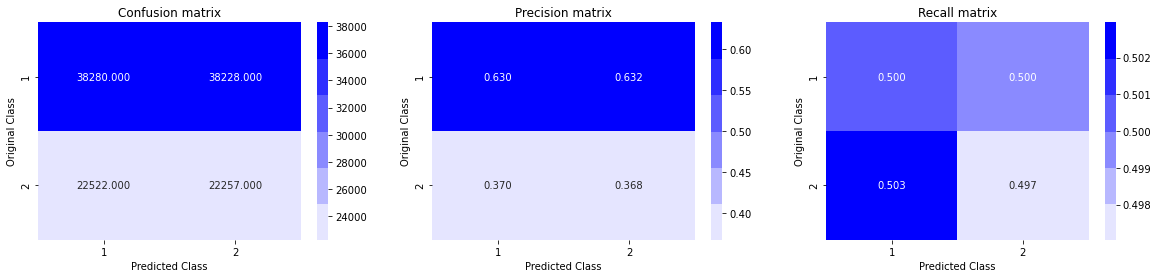

In [14]:
predicted_y = np.zeros((len(y_test),2))
for i in range(len(y_test)):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

Log loss on Test Data using Random Model 0.8877213571455722


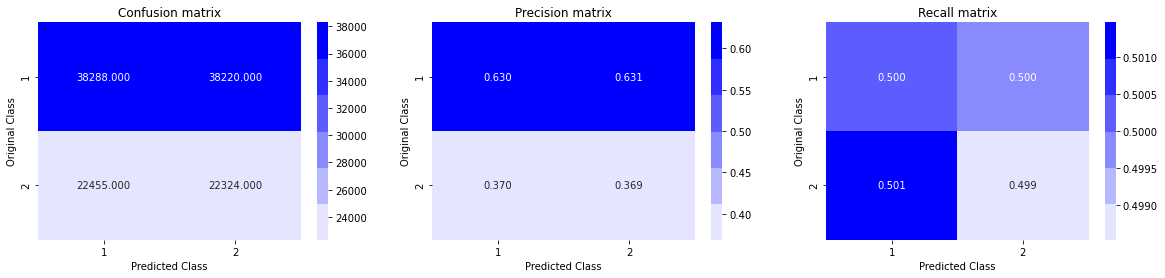

In [15]:
predicted_y = np.zeros((len(y_test),2))
for i in range(len(y_test)):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(rand_probs[0])))
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

##  Logistic Regression with hyperparameter tuning 

For values of alpha =  1e-05 The log loss is: 0.4515468808653
For values of alpha =  0.0001 The log loss is: 0.45836876582695907
For values of alpha =  0.001 The log loss is: 0.45037896882244177
For values of alpha =  0.01 The log loss is: 0.42193294882114807
For values of alpha =  0.1 The log loss is: 0.43783834809676614
For values of alpha =  1 The log loss is: 0.4722579427957021
For values of alpha =  10 The log loss is: 0.5177962952694684


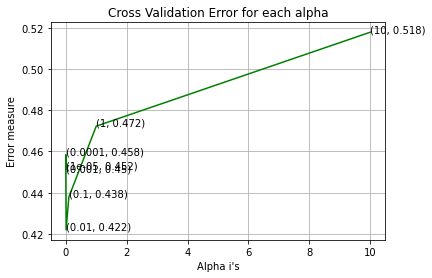

In [24]:
alpha_i = [ 10**i for i in range(-5,2)]

log_error_array=[]
for i in alpha_i:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha_i, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha_i[i],np.round(txt,3)), (alpha_i[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


For values of best alpha =  0.01 The train log loss is: 0.42118423103054925
For values of best alpha =  0.01 The test log loss is: 0.42193294882114807
Total number of data points : 121287


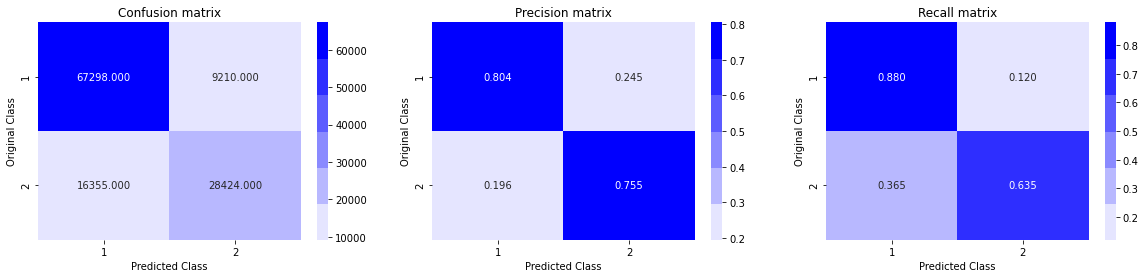

In [25]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha_i[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha_i[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha_i[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.4420550169187926
For values of alpha =  0.0001 The log loss is: 0.4456345334892557
For values of alpha =  0.001 The log loss is: 0.4707562613473163
For values of alpha =  0.01 The log loss is: 0.5197587226854571
For values of alpha =  0.1 The log loss is: 0.5165631360117122
For values of alpha =  1 The log loss is: 0.5772638517806775
For values of alpha =  10 The log loss is: 0.6497876658924816


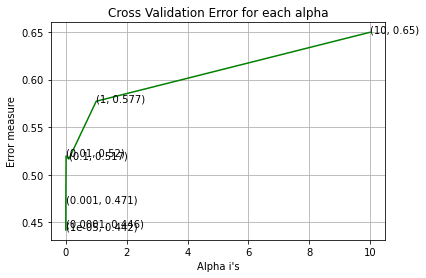

In [28]:
alpha = [10 ** x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  1e-05 The train log loss is: 0.4417742386982024
For values of best alpha =  1e-05 The test log loss is: 0.4420550169187926
Total number of data points : 121287


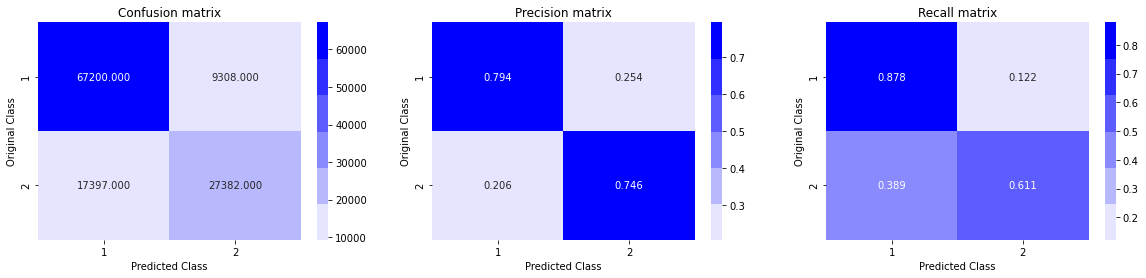

In [29]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## XGBoost

In [30]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68487	valid-logloss:0.68487
[10]	train-logloss:0.61535	valid-logloss:0.61548
[20]	train-logloss:0.56464	valid-logloss:0.56478
[30]	train-logloss:0.52643	valid-logloss:0.52660
[40]	train-logloss:0.49728	valid-logloss:0.49755
[50]	train-logloss:0.47439	valid-logloss:0.47467
[60]	train-logloss:0.45607	valid-logloss:0.45637
[70]	train-logloss:0.44134	valid-logloss:0.44165
[80]	train-logloss:0.42950	valid-logloss:0.42982
[90]	train-logloss:0.41988	valid-logloss:0.42021
[100]	train-logloss:0.41207	valid-logloss:0.41235
[110]	train-logloss:0.40546	valid-logloss:0.40577
[120]	train-logloss:0.39988	valid-logloss:0.40022
[130]	train-logloss:0.39517	valid-logloss:0.39553
[140]	train-logloss:0.39127	valid-logloss:0.39163
[150]	train-logloss:0.38768	valid-logloss:0.38805
[160]	train-logloss:0.38471	valid-logloss:0.38512
[170]	train-logloss:0.38209	valid-logloss:0.38256
[180]	train-logloss:0.37980	valid-logloss:0.38029
[190]	train-logloss:0.37776	valid-logloss:0.37826
[200]	train